In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-10-f625ed691009>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Data energy/Residential-Profiles.xlsx')
df.head()


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Residential Electricity Demand [W],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200
0,Time,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,...,Household 191,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200
1,2010-01-01 00:00:00,274.16,576.44,1523.9,659.67,1757.7,339.6,1061.9,869.47,230,...,332.37,1743,923.41,741.07,259.89,409.01,275.91,2071,1917.4,664.39
2,2010-01-01 00:10:00,318.33,425.09,914.6,349.35,1757.7,283.51,391.94,869.47,230,...,332.71,1683.7,939.12,445.06,262.8,409.01,275.91,1919.1,2215.2,294.39
3,2010-01-01 00:20:00,1031.4,425.09,1692.6,313.15,2615.3,334.73,391.94,868.31,275.62,...,1057.7,1687.5,268.28,355.4,265.97,353.04,275.4,2390.7,2196.6,272.92
4,2010-01-01 00:30:00,293.63,425.09,798.89,325.88,2482.6,1008.2,466.34,869.47,1007,...,320.73,1687.5,263.6,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.4


In [5]:
df_main = df
df_main.columns = df.iloc[0]

df_main = df_main.iloc[1:].reset_index(drop=True)

df_main

,Time,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,...,Household 191,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200
0,2010-01-01 00:00:00,274.16,576.44,1523.9,659.67,1757.7,339.6,1061.9,869.47,230,...,332.37,1743,923.41,741.07,259.89,409.01,275.91,2071,1917.4,664.39
1,2010-01-01 00:10:00,318.33,425.09,914.6,349.35,1757.7,283.51,391.94,869.47,230,...,332.71,1683.7,939.12,445.06,262.8,409.01,275.91,1919.1,2215.2,294.39
2,2010-01-01 00:20:00,1031.4,425.09,1692.6,313.15,2615.3,334.73,391.94,868.31,275.62,...,1057.7,1687.5,268.28,355.4,265.97,353.04,275.4,2390.7,2196.6,272.92
3,2010-01-01 00:30:00,293.63,425.09,798.89,325.88,2482.6,1008.2,466.34,869.47,1007,...,320.73,1687.5,263.6,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.4
4,2010-01-01 00:40:00,310.84,461.19,1741.5,339,3340.5,1060,479.47,1168.3,314.83,...,317.64,2038.7,263.6,445.06,259.89,1115,995.15,2058.3,2864.6,294.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2010-12-31 23:10:00,931.06,1740.9,1029.6,640.18,1923.6,241.73,230,1078.1,230,...,982.73,574.63,961.19,230,238.48,2774.5,233.9,832.88,1783.6,1644.7
52556,2010-12-31 23:20:00,924.7,973.59,365.46,640.18,600,263.48,974.26,1625,955,...,257.73,574.63,235.52,1034,962.85,1248.6,245.08,1507.4,900,919.74
52557,2010-12-31 23:30:00,1631.4,272.35,420.62,600,1132.3,988.19,321.04,1005.2,230,...,982.73,574.63,235.35,235.64,962.73,625.87,245.08,280.49,1783.5,919.74
52558,2010-12-31 23:40:00,931.06,345.94,420.61,640.18,296.28,258.33,230,972.86,230,...,999.16,574.63,236.52,303.36,237.85,674.45,245.08,832.86,600,919.74


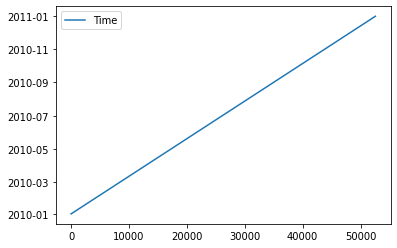

In [7]:
import matplotlib.pyplot as plt
df_main.Time.plot(legend=True) #plot usa column
plt.show()

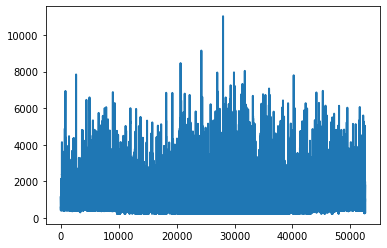

In [8]:
import matplotlib.pyplot as plt
df_main["Household 2"].plot(lw=2) #plot usa column
plt.show()

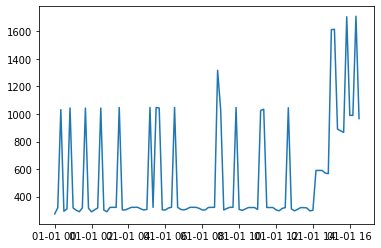

In [9]:
A = df_main['Household 1'].iloc[0:100]
B = df_main['Time'].iloc[0:100]

line, = plt.plot(B, A )

plt.show()

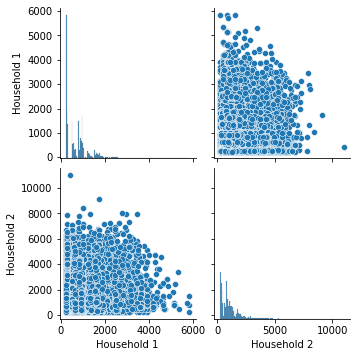

In [8]:
# Pair Plot correlation between all attributes
sns.pairplot(df_main[['Household 1', 'Household 2']])

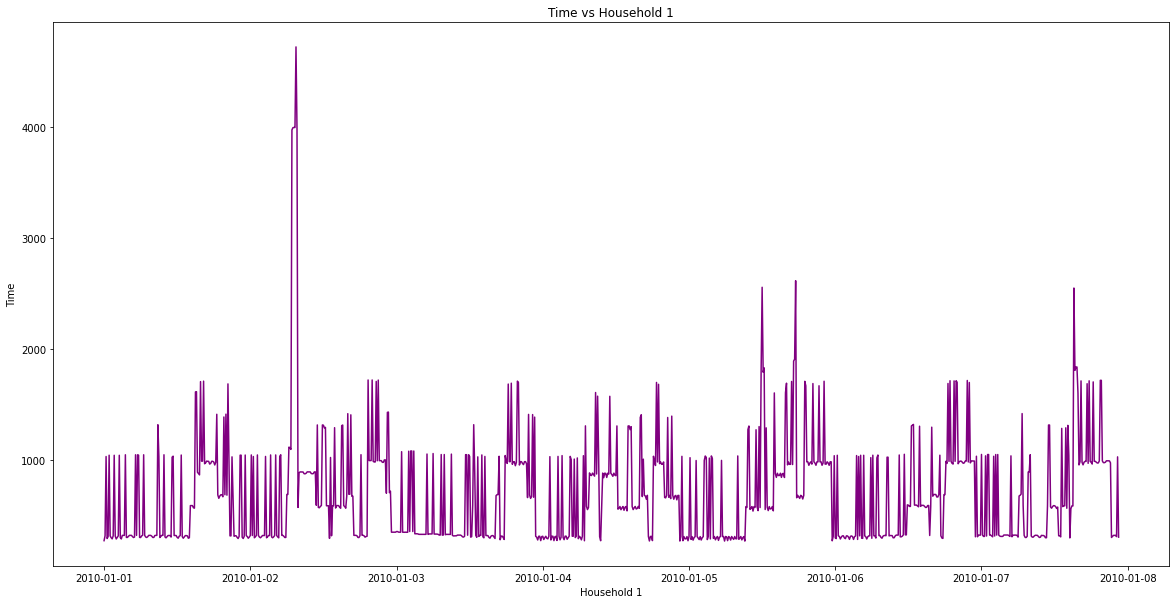

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(df_main['Time'][0:1000],
        df_main['Household 1'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Household 1",
       ylabel="Time",
       title="Time vs Household 1")

plt.show()

# LSTM model main

In [40]:
print(df_main.shape)
df_x = df_main.drop(columns=["Household 1"])
print(df_x.shape)
df_test = df_main["Household 1"]
print(df_test.shape)

(52560, 201)
(52560, 200)
(52560,)


In [55]:
df_cop = df_main
df_cop.set_index("Time", inplace=True)
df1=df_cop.filter(['Household 1'], axis=1)
df1

,Household 1
Time,
2010-01-01 00:00:00,274.16
2010-01-01 00:10:00,318.33
2010-01-01 00:20:00,1031.4
2010-01-01 00:30:00,293.63
2010-01-01 00:40:00,310.84
...,...
2010-12-31 23:10:00,931.06
2010-12-31 23:20:00,924.7
2010-12-31 23:30:00,1631.4


In [57]:
dfti=df1.resample('240min').agg({"Household 1":"sum"})
dfti

,Household 1
Time,
2010-01-01 00:00:00,11020.58
2010-01-01 04:00:00,10473.7
2010-01-01 08:00:00,11431.22
2010-01-01 12:00:00,15221.27
2010-01-01 16:00:00,22969.99
...,...
2010-12-31 04:00:00,12181.66
2010-12-31 08:00:00,21504.08
2010-12-31 12:00:00,21630.18


In [58]:

dfti["EV_lag_1"] = dfti["Household 1"].shift(-1)
dfti["EV_lag_2"] = dfti["Household 1"].shift(-2)
dfti["EV_lag_3"] = dfti["Household 1"].shift(-3)
dfti["EV_lag_4"] = dfti["Household 1"].shift(-4)
dfti["EV_lag_5"] = dfti["Household 1"].shift(-5)
dfti["EV_lag_6"] = dfti["Household 1"].shift(-6)

In [60]:

dfti=dfti.reset_index()
dfti

,index,Time,Household 1,EV_lag_1,EV_lag_2,EV_lag_3,EV_lag_4,EV_lag_5,EV_lag_6
0,0,2010-01-01 00:00:00,11020.58,10473.7,11431.22,15221.27,22969.99,14223.19,11137.72
1,1,2010-01-01 04:00:00,10473.7,11431.22,15221.27,22969.99,14223.19,11137.72,35852.13
2,2,2010-01-01 08:00:00,11431.22,15221.27,22969.99,14223.19,11137.72,35852.13,20619.39
3,3,2010-01-01 12:00:00,15221.27,22969.99,14223.19,11137.72,35852.13,20619.39,18280.12
4,4,2010-01-01 16:00:00,22969.99,14223.19,11137.72,35852.13,20619.39,18280.12,15413.74
...,...,...,...,...,...,...,...,...,...
2185,2185,2010-12-31 04:00:00,12181.66,21504.08,21630.18,14357.75,22014.45,NaN,NaN
2186,2186,2010-12-31 08:00:00,21504.08,21630.18,14357.75,22014.45,NaN,NaN,NaN
2187,2187,2010-12-31 12:00:00,21630.18,14357.75,22014.45,NaN,NaN,NaN,NaN
2188,2188,2010-12-31 16:00:00,14357.75,22014.45,NaN,NaN,NaN,NaN,NaN


In [61]:
# We have every 4hours of data ready now
df3=dfti.filter(['Household 1','EV_lag_1','EV_lag_2','EV_lag_3','EV_lag_4','EV_lag_5','EV_lag_6'], axis=1)
df3

,Household 1,EV_lag_1,EV_lag_2,EV_lag_3,EV_lag_4,EV_lag_5,EV_lag_6
0,11020.58,10473.7,11431.22,15221.27,22969.99,14223.19,11137.72
1,10473.7,11431.22,15221.27,22969.99,14223.19,11137.72,35852.13
2,11431.22,15221.27,22969.99,14223.19,11137.72,35852.13,20619.39
3,15221.27,22969.99,14223.19,11137.72,35852.13,20619.39,18280.12
4,22969.99,14223.19,11137.72,35852.13,20619.39,18280.12,15413.74
...,...,...,...,...,...,...,...
2185,12181.66,21504.08,21630.18,14357.75,22014.45,NaN,NaN
2186,21504.08,21630.18,14357.75,22014.45,NaN,NaN,NaN
2187,21630.18,14357.75,22014.45,NaN,NaN,NaN,NaN
2188,14357.75,22014.45,NaN,NaN,NaN,NaN,NaN


In [62]:
df3.drop(df3.tail(6).index,inplace = True)
#df3 is our final dataset we need to use to predict the next days first 4 hours of charging
df3

,Household 1,EV_lag_1,EV_lag_2,EV_lag_3,EV_lag_4,EV_lag_5,EV_lag_6
0,11020.58,10473.7,11431.22,15221.27,22969.99,14223.19,11137.72
1,10473.7,11431.22,15221.27,22969.99,14223.19,11137.72,35852.13
2,11431.22,15221.27,22969.99,14223.19,11137.72,35852.13,20619.39
3,15221.27,22969.99,14223.19,11137.72,35852.13,20619.39,18280.12
4,22969.99,14223.19,11137.72,35852.13,20619.39,18280.12,15413.74
...,...,...,...,...,...,...,...
2179,13608.97,11443.44,19770.65,19044.89,9149.12,11009.7,12181.66
2180,11443.44,19770.65,19044.89,9149.12,11009.7,12181.66,21504.08
2181,19770.65,19044.89,9149.12,11009.7,12181.66,21504.08,21630.18
2182,19044.89,9149.12,11009.7,12181.66,21504.08,21630.18,14357.75


In [63]:
train=df3[0:2100]
test=df3[2100:2185]
     

In [64]:

train_X=train[['Household 1','EV_lag_1','EV_lag_2','EV_lag_3','EV_lag_4','EV_lag_5']]

train_X=train[['Household 1','EV_lag_1','EV_lag_2','EV_lag_3','EV_lag_4','EV_lag_5']]
train_y=train[['EV_lag_6']]
test_X=test[['Household 1','EV_lag_1','EV_lag_2','EV_lag_3','EV_lag_4','EV_lag_5']]
test_y=test[['EV_lag_6']]

In [65]:

#Scaling has to be done for LSTM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc2= StandardScaler()
train_X_sc=sc.fit_transform(train_X)
train_y_sc=sc2.fit_transform(train_y)
test_X_sc=sc.transform(test_X)
test_y_sc=X_test = sc2.transform(test_y)

In [66]:

train_X_sc = pd.DataFrame(train_X_sc)
train_y_sc = pd.DataFrame(train_y_sc)
test_X_sc = pd.DataFrame(test_X_sc)
test_y_sc = pd.DataFrame(test_y_sc)


In [67]:

# create and fit the LSTM network 1
model = Sequential()
model.add(LSTM(6, input_shape=(6,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X_sc, train_y_sc, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2100/2100 - 8s - loss: 0.8329 - 8s/epoch - 4ms/step
Epoch 2/100
2100/2100 - 6s - loss: 0.6853 - 6s/epoch - 3ms/step
Epoch 3/100
2100/2100 - 8s - loss: 0.5579 - 8s/epoch - 4ms/step
Epoch 4/100
2100/2100 - 5s - loss: 0.5234 - 5s/epoch - 2ms/step
Epoch 5/100
2100/2100 - 5s - loss: 0.5147 - 5s/epoch - 2ms/step
Epoch 6/100
2100/2100 - 5s - loss: 0.5105 - 5s/epoch - 2ms/step
Epoch 7/100
2100/2100 - 5s - loss: 0.5053 - 5s/epoch - 2ms/step
Epoch 8/100
2100/2100 - 5s - loss: 0.5007 - 5s/epoch - 2ms/step
Epoch 9/100
2100/2100 - 9s - loss: 0.5026 - 9s/epoch - 4ms/step
Epoch 10/100
2100/2100 - 6s - loss: 0.4986 - 6s/epoch - 3ms/step
Epoch 11/100
2100/2100 - 6s - loss: 0.4960 - 6s/epoch - 3ms/step
Epoch 12/100
2100/2100 - 6s - loss: 0.4955 - 6s/epoch - 3ms/step
Epoch 13/100
2100/2100 - 5s - loss: 0.4941 - 5s/epoch - 3ms/step
Epoch 14/100
2100/2100 - 5s - loss: 0.4919 - 5s/epoch - 2ms/step
Epoch 15/100
2100/2100 - 6s - loss: 0.4907 - 6s/epoch - 3ms/step
Epoch 16/100
2100/2100 - 5s - loss

In [68]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import math

# make predictions
trainPredict = pd.DataFrame(model.predict(train_X_sc))
testPredict = pd.DataFrame(model.predict(test_X_sc))

# invert predictions
trainPredict = sc2.inverse_transform(trainPredict)
testPredict = sc2.inverse_transform(testPredict)

trainPredict = pd.DataFrame(trainPredict)
testPredict = pd.DataFrame(testPredict)


#invert train y and test y
train_y_plot = pd.DataFrame(sc2.inverse_transform(train_y_sc))
test_y_plot = pd.DataFrame(sc2.inverse_transform(test_y_sc))

trainScore = math.sqrt(mean_squared_error(train_y_plot, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_y_plot, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 5ms/step
Train Score: 6766.61 RMSE
Test Score: 5268.43 RMSE


In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(train_y_plot, trainPredict)

0.5697938591219369

In [70]:

# plot baseline and predictions
plt.plot(train_y_plot)
plt.plot(trainPredict)
plt.show()

<IPython.core.display.Javascript object>

In [71]:

plt.plot(test_y_plot)
plt.plot(testPredict)
plt.show()

In [72]:

# MAPE function
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def median_ape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.median(np.abs((actual - pred) / actual)) * 100

In [73]:

# Calculate MAPE
mape_train = mape(train_y_plot+0.01, trainPredict)
mape_test = mape(test_y_plot+0.01, testPredict)
print("MAPE of training set:",np.round(mape_train,2), "MAPE of testing set:", np.round(mape_test,2))



MAPE of training set: 30.31 MAPE of testing set: 24.34


In [74]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout # Careful
from keras.layers import BatchNormalization

In [75]:

# create and fit the LSTM network 2
model = Sequential()
model.add(LSTM(6, return_sequences=True, input_shape=(6,1)))
model.add(LSTM(6))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))
optimizer = Adam(clipvalue=1.0)
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(train_X_sc, train_y_sc, epochs=100, batch_size=24, verbose=2)

Epoch 1/100
88/88 - 5s - loss: 1.0128 - 5s/epoch - 59ms/step
Epoch 2/100
88/88 - 1s - loss: 0.8453 - 590ms/epoch - 7ms/step
Epoch 3/100
88/88 - 1s - loss: 0.7909 - 568ms/epoch - 6ms/step
Epoch 4/100
88/88 - 1s - loss: 0.7193 - 597ms/epoch - 7ms/step
Epoch 5/100
88/88 - 1s - loss: 0.6674 - 567ms/epoch - 6ms/step
Epoch 6/100
88/88 - 1s - loss: 0.6555 - 613ms/epoch - 7ms/step
Epoch 7/100
88/88 - 1s - loss: 0.6342 - 723ms/epoch - 8ms/step
Epoch 8/100
88/88 - 1s - loss: 0.6165 - 596ms/epoch - 7ms/step
Epoch 9/100
88/88 - 1s - loss: 0.5871 - 608ms/epoch - 7ms/step
Epoch 10/100
88/88 - 1s - loss: 0.6134 - 641ms/epoch - 7ms/step
Epoch 11/100
88/88 - 1s - loss: 0.5855 - 586ms/epoch - 7ms/step
Epoch 12/100
88/88 - 1s - loss: 0.5832 - 655ms/epoch - 7ms/step
Epoch 13/100
88/88 - 1s - loss: 0.5617 - 584ms/epoch - 7ms/step
Epoch 14/100
88/88 - 1s - loss: 0.5838 - 605ms/epoch - 7ms/step
Epoch 15/100
88/88 - 1s - loss: 0.5820 - 598ms/epoch - 7ms/step
Epoch 16/100
88/88 - 1s - loss: 0.5581 - 641ms/epoc

In [76]:
trainScore = math.sqrt(mean_squared_error(train_y_plot, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_y_plot, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6766.61 RMSE
Test Score: 5268.43 RMSE


In [77]:
r2_score(train_y_plot, trainPredict)   

0.5697938591219369

In [78]:
# plot baseline and predictions
plt.plot(train_y_plot)
plt.plot(trainPredict)
plt.show()

In [79]:
# plot baseline and predictions
plt.plot(train_y_plot)
plt.plot(trainPredict)
plt.show()

In [91]:
df3.EV_lag_1.plot(legend=True) #plot usa column
plt.show()

In [80]:
# Calculate MAPE
mape_train = mape(train_y_plot+0.01, trainPredict)
mape_test = mape(test_y_plot+0.01, testPredict)
print("MAPE of training set:",np.round(mape_train,2), "MAPE of testing set:", np.round(mape_test,2))

MAPE of training set: 30.31 MAPE of testing set: 24.34
